In [193]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Malgun Gothic'

In [194]:
nut = pd.read_csv('음식분류 AI 데이터 영양DB.csv',encoding='cp949')

In [195]:
nut.columns

Index(['음 식 명', '중량(g)', '에너지(kcal)', '탄수화물(g)', '당류(g)', '지방(g)', '단백질(g)',
       '칼슘(mg)', '인(mg)', '나트륨(mg)', '칼륨(mg)', '마그네슘(mg)', '철(mg)', '아연(mg)',
       '콜레스테롤(mg)', '트랜스지방(g)'],
      dtype='object')

In [196]:
nut[['음 식 명','중량(g)','에너지(kcal)','탄수화물(g)','단백질(g)','지방(g)','나트륨(mg)','당류(g)']]

,음 식 명,중량(g),에너지(kcal),탄수화물(g),단백질(g),지방(g),나트륨(mg),당류(g)
0,쌀밥,210.0,334.80,73.71,5.76,0.45,59.40,0.00
1,기타잡곡밥,200.0,302.36,65.52,6.71,0.75,3.39,0.00
2,콩밥,200.0,322.90,65.85,8.43,1.67,4.10,0.00
3,보리밥,200.0,316.10,70.57,5.55,0.14,4.50,0.00
4,돌솥밥,350.0,528.86,101.85,10.19,8.35,618.32,0.00
...,...,...,...,...,...,...,...,...
395,다식,30.0,105.17,20.81,3.55,1.73,3.85,6.46
396,약과,30.0,113.85,22.18,2.57,1.24,16.46,2.15
397,유과,30.0,129.06,24.14,0.36,3.50,7.06,1.12
398,산자,30.0,121.70,24.70,0.91,1.20,8.01,10.63


In [197]:
# nut['중량(g)']/nut['중량(g)']*100

In [198]:
nut = nut.replace('-','0')

In [227]:
columns = nut.columns.drop('음 식 명')
nut[columns] = nut[columns].astype(float)

In [228]:
nut['비율'] = 100/nut['중량(g)']


# 영양정보 데이터 조정
numeric_columns = nut.columns.drop(['음 식 명', '중량(g)', '비율'])
nut[numeric_columns] = nut[numeric_columns].mul(nut['비율'], axis=0)

# 중량을 100으로 조정
nut['중량(g)'] = 100

nut.drop('비율',axis=1,inplace=True)

In [229]:
nut.columns

Index(['음 식 명', '중량(g)', '에너지(kcal)', '탄수화물(g)', '단백질(g)', '지방(g)', '당류(g)',
       '나트륨(mg)'],
      dtype='object')

In [230]:
nut = nut[['음 식 명','중량(g)','에너지(kcal)','탄수화물(g)','단백질(g)','지방(g)','당류(g)','나트륨(mg)']]

In [231]:
nut

,음 식 명,중량(g),에너지(kcal),탄수화물(g),단백질(g),지방(g),당류(g),나트륨(mg)
0,쌀밥,100,159.428571,35.100000,2.742857,0.214286,0.000000,28.285714
1,기타잡곡밥,100,151.180000,32.760000,3.355000,0.375000,0.000000,1.695000
2,콩밥,100,161.450000,32.925000,4.215000,0.835000,0.000000,2.050000
3,보리밥,100,158.050000,35.285000,2.775000,0.070000,0.000000,2.250000
4,돌솥밥,100,151.102857,29.100000,2.911429,2.385714,0.000000,176.662857
...,...,...,...,...,...,...,...,...
395,다식,100,350.566667,69.366667,11.833333,5.766667,21.533333,12.833333
396,약과,100,379.500000,73.933333,8.566667,4.133333,7.166667,54.866667
397,유과,100,430.200000,80.466667,1.200000,11.666667,3.733333,23.533333
398,산자,100,405.666667,82.333333,3.033333,4.000000,35.433333,26.700000


In [232]:
x = ['쌀밥','돼지갈비','삼겹살','찜닭']
result = nut.loc[nut['음 식 명'].isin(x)].sum()
result.drop(['음 식 명','중량(g)'],inplace=True)
print(dict[result])

dict[에너지(kcal)    498.507238
탄수화물(g)          52.076
단백질(g)        30.352857
지방(g)         17.350286
당류(g)          8.844667
나트륨(mg)      725.848381
dtype: object]


In [205]:
image_names = ['라면','김치찌개','쌀밥','돼지갈비','삼겹살','찜닭','쌀밥','돼지갈비'] #머신러닝 한 후 이름을 받아서 데이터 넣기

# 결과를 저장할 빈 시리즈 생성
result1 = pd.Series(dtype=float)

# 이미지 이름 값에 대한 데이터 추출 및 결과 계산
for image_name in image_names:
    # 이미지 이름 값을 사용하여 데이터 추출
    image_data = nut.loc[nut['음 식 명'] == image_name]

    # 추출한 데이터의 합계 계산 (중량(g) 제외)
    image_result1 = image_data.sum()
    image_result1.drop(['음 식 명', '중량(g)'], inplace=True)

    # 결과를 누적하기 위해 시리즈에 추가
    result1 = result1.add(image_result1, fill_value=0)

# 결과 출력
print(result1)

에너지(kcal)     999.061264
탄수화물(g)       109.897818
단백질(g)         55.605714
지방(g)          35.491844
당류(g)          13.854667
나트륨(mg)      1407.296823
dtype: object


<Figure size 1000x600 with 0 Axes>

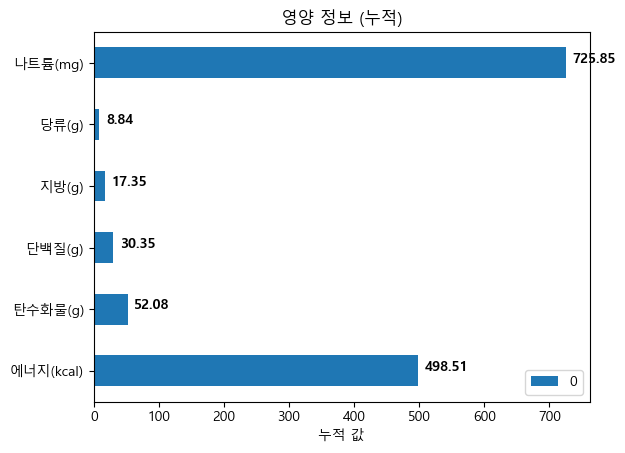

In [206]:
df = pd.DataFrame(result)

# 막대 그래프 그리기
plt.figure(figsize=(10, 6))
df.plot(kind='barh', stacked=True)

# 막대에 값 표시
for i, row in enumerate(df.itertuples()):
    for j, value in enumerate(row[1:]):
        plt.text(value + 10, i, f'{value:.2f}', color='black', fontweight='bold')

# 항목 표시
plt.yticks(range(len(df)), df.index)

# 축 레이블 및 제목 설정
plt.xlabel('누적 값')
plt.title('영양 정보 (누적)')

# 그래프 출력
plt.show()

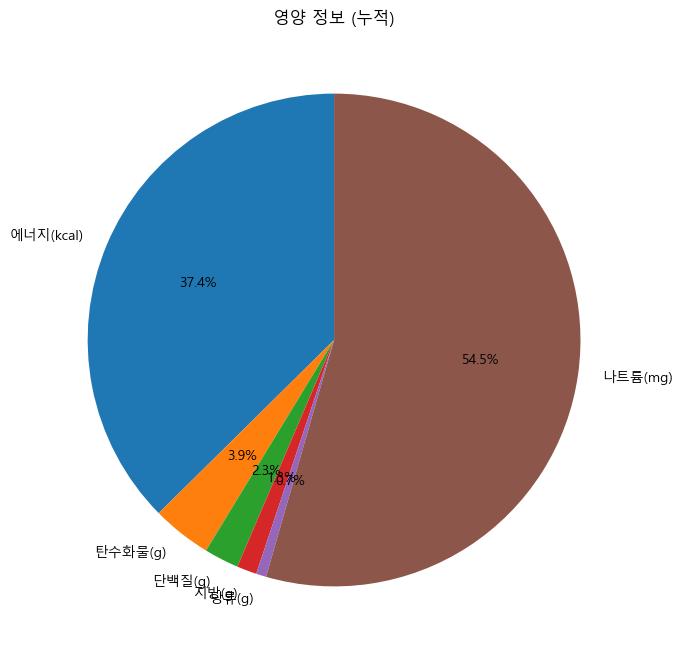

In [207]:
df = pd.DataFrame(result)

# 원형 그래프 그리기
plt.figure(figsize=(8, 8))
plt.pie(df.iloc[:, 0], labels=df.index, autopct='%1.1f%%', startangle=90)

# 제목 설정
plt.title('영양 정보 (누적)')

# 그래프 출력
plt.show()


In [208]:
df_base = pd.DataFrame(result1)

In [209]:
df_input = pd.DataFrame(result)

In [210]:
df_input

,0
에너지(kcal),498.507238
탄수화물(g),52.076
단백질(g),30.352857
지방(g),17.350286
당류(g),8.844667
나트륨(mg),725.848381


In [211]:
df_base

,0
에너지(kcal),999.061264
탄수화물(g),109.897818
단백질(g),55.605714
지방(g),35.491844
당류(g),13.854667
나트륨(mg),1407.296823


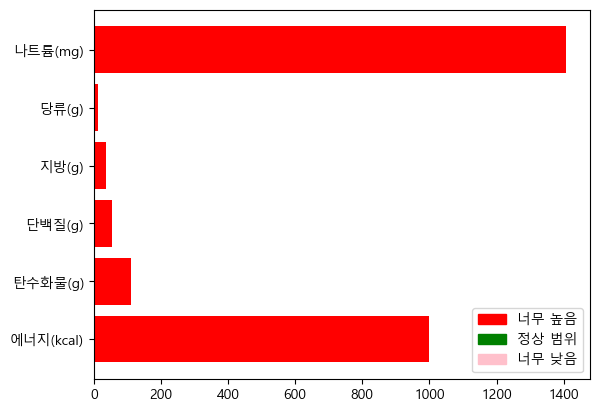

In [212]:
import pandas as pd
import matplotlib.pyplot as plt

# 기준값 (result)
df_base = pd.DataFrame({'Category': result.index,
                        'Value': result.values})

# 입력값 (result1)
df_input = pd.DataFrame({'Category': result1.index,
                         'Value': result1.values})

# 색상 설정
colors = []
for value_base, value_input in zip(df_base['Value'], df_input['Value']):
    if value_input > value_base:
        colors.append('red')
    elif value_input < value_base - 10:
        colors.append('pink')
    else:
        colors.append('green')

# 차트 그리기
plt.barh(df_base['Category'], df_base['Value'], color='lightgray')
plt.barh(df_input['Category'], df_input['Value'], color=colors)

# 범례 설정
legend_colors = ['red', 'green', 'pink']
legend_labels = ['너무 높음', '정상 범위', '너무 낮음']
plt.legend(handles=[plt.Rectangle((0, 0), 1, 1, color=color) for color in legend_colors],
           labels=legend_labels)

# 그래프 출력
plt.show()


In [213]:
pd.read_csv('평균 칼로리, 영양성분.csv',encoding='cp949')

,나이 범위,성별,에너지 (kcal),탄수화물 (g),단백질 (g),지방 (g),당류 (g) 이하,나트륨 (mg) 이하
0,20-29세,남성,1660-1750,300-400,55-75,70-90,25,2300
1,30-39세,남성,1640-1700,300-400,55-75,70-90,25,2300
2,40-49세,남성,1620-1680,275-375,55-75,70-90,25,2300
3,50-59세,남성,1600-1650,250-350,55-75,70-90,25,2300
4,60-69세,남성,1520-1590,250-350,55-75,70-90,25,2300
5,70세 이상,남성,1450-1520,225-325,55-75,70-90,25,2300
6,20-29세,여성,1420-1510,225-325,45-65,60-80,25,2300
7,30-39세,여성,1390-1480,225-325,45-65,60-80,25,2300
8,40-49세,여성,1360-1440,225-325,45-65,60-80,25,2300
9,50-59세,여성,1330-1410,200-300,45-65,60-80,25,2300


In [214]:
import sqlite3
import pandas as pd

# CSV 파일을 데이터프레임으로 읽기
df = pd.read_csv('평균 칼로리, 영양성분.csv',encoding='cp949')

# SQLite 데이터베이스에 연결
conn = sqlite3.connect('per.db')

# 데이터프레임을 SQLite 데이터베이스에 쓰기
df.to_sql('nutrition', conn, if_exists='replace', index=False)

# 연결 종료
conn.close()


In [215]:
import sqlite3

# SQLite 데이터베이스에 연결
conn = sqlite3.connect('per.db')

# 커서 생성
cur = conn.cursor()

# 테이블 목록 조회
cur.execute("SELECT name FROM sqlite_master WHERE type='table'")
tables = cur.fetchall()

# 테이블 스키마 및 데이터 확인
for table in tables:
    table_name = table[0]
    print(f"Table: {table_name}")

    # 스키마 확인
    cur.execute(f"PRAGMA table_info({table_name})")
    columns = cur.fetchall()
    print("Columns:")
    for column in columns:
        column_name = column[1]
        print(column_name)

    # 데이터 확인
    cur.execute(f"SELECT * FROM {table_name}")
    data = cur.fetchall()
    print("Data:")
    for row in data:
        print(row)

# 연결 종료
conn.close()


Table: nutrition
Columns:
나이 범위
성별
에너지 (kcal)
탄수화물 (g)
단백질 (g)
지방 (g)
당류 (g) 이하
나트륨 (mg) 이하
Data:
('20-29세', '남성', '1660-1750', '300-400', '55-75', '70-90', 25, 2300)
('30-39세', '남성', '1640-1700', '300-400', '55-75', '70-90', 25, 2300)
('40-49세', '남성', '1620-1680', '275-375', '55-75', '70-90', 25, 2300)
('50-59세', '남성', '1600-1650', '250-350', '55-75', '70-90', 25, 2300)
('60-69세', '남성', '1520-1590', '250-350', '55-75', '70-90', 25, 2300)
('70세 이상', '남성', '1450-1520', '225-325', '55-75', '70-90', 25, 2300)
('20-29세', '여성', '1420-1510', '225-325', '45-65', '60-80', 25, 2300)
('30-39세', '여성', '1390-1480', '225-325', '45-65', '60-80', 25, 2300)
('40-49세', '여성', '1360-1440', '225-325', '45-65', '60-80', 25, 2300)
('50-59세', '여성', '1330-1410', '200-300', '45-65', '60-80', 25, 2300)
('60-69세', '여성', '1260-1330', '200-300', '45-65', '60-80', 25, 2300)
('70세 이상', '여성', '1200-1260', '175-275', '45-65', '60-80', 25, 2300)


In [216]:
# import sqlite3

# # SQLite 데이터베이스에 연결
# conn = sqlite3.connect('per.db')

# # 사용자로부터 나이와 성별 입력 받기
# age = int(input("나이를 입력하세요: "))
# gender = input("성별을 입력하세요 (남성 또는 여성): ")

# # 나이와 성별에 해당하는 영양 정보 조회 쿼리 작성
# if age >= 70:
#     query = f"SELECT `에너지 (kcal)`, `탄수화물 (g)`, `단백질 (g)`, `지방 (g)`, `당류 (g) 이하`, `나트륨 (mg) 이하` FROM nutrition WHERE '70세 이상' = `나이 범위` AND 성별 = '{gender}'"
# else:
#     query = f"SELECT `에너지 (kcal)`, `탄수화물 (g)`, `단백질 (g)`, `지방 (g)`, `당류 (g) 이하`, `나트륨 (mg) 이하` FROM nutrition WHERE '{age}세' BETWEEN substr(`나이 범위`, 1, 2) AND substr(`나이 범위`, 4, 2) AND 성별 = '{gender}'"

# # 쿼리 실행하여 결과 가져오기
# cur = conn.cursor()
# cur.execute(query)
# result = cur.fetchone()

# # 결과 출력
# print(result)

# # 연결 종료
# conn.close()


In [217]:
import sqlite3

# SQLite 데이터베이스에 연결
conn = sqlite3.connect('per.db')

# 사용자로부터 나이와 성별 입력 받기
age = int(input("나이를 입력하세요: "))
gender = input("성별을 입력하세요 (남성 또는 여성): ")

# 나이와 성별에 해당하는 영양 정보 조회 쿼리 작성
if age >= 70:
    query = f"SELECT `에너지 (kcal)`, `탄수화물 (g)`, `단백질 (g)`, `지방 (g)`, `당류 (g) 이하`, `나트륨 (mg) 이하` FROM nutrition WHERE '70세 이상' = `나이 범위` AND 성별 = '{gender}'"
else:
    query = f"SELECT `에너지 (kcal)`, `탄수화물 (g)`, `단백질 (g)`, `지방 (g)`, `당류 (g) 이하`, `나트륨 (mg) 이하` FROM nutrition WHERE '{age}세' BETWEEN substr(`나이 범위`, 1, 2) AND substr(`나이 범위`, 4, 2) AND 성별 = '{gender}'"

# 쿼리 실행하여 결과 가져오기
cur = conn.cursor()
cur.execute(query)
result = cur.fetchone()

# 결과 출력
# 문자열 형태의 범위 값을 숫자 범위로 변환하여 출력
kcal_range = result[0].split('-')
kcal_min = int(kcal_range[0])
kcal_max = int(kcal_range[1])
print(f'칼로리 (kcal): {kcal_min}~{kcal_max}')

carb_range = result[1].split('-')
carb_min = int(carb_range[0])
carb_max = int(carb_range[1])
print(f'탄수화물 (g): {carb_min}~{carb_max}')

protein_range = result[2].split('-')
protein_min = int(protein_range[0])
protein_max = int(protein_range[1])
print(f'단백질 (g): {protein_min}~{protein_max}')

fat_range = result[3].split('-')
fat_min = int(fat_range[0])
fat_max = int(fat_range[1])
print(f'지방 (g): {fat_min}~{fat_max}')

sugar_max = result[4]
print(f'당류 (g) 이하: {sugar_max}')

sodium_max = result[5]
print(f'나트륨 (mg) 이하: {sodium_max}')

# 연결 종료
conn.close()


ValueError: invalid literal for int() with base 10: ''

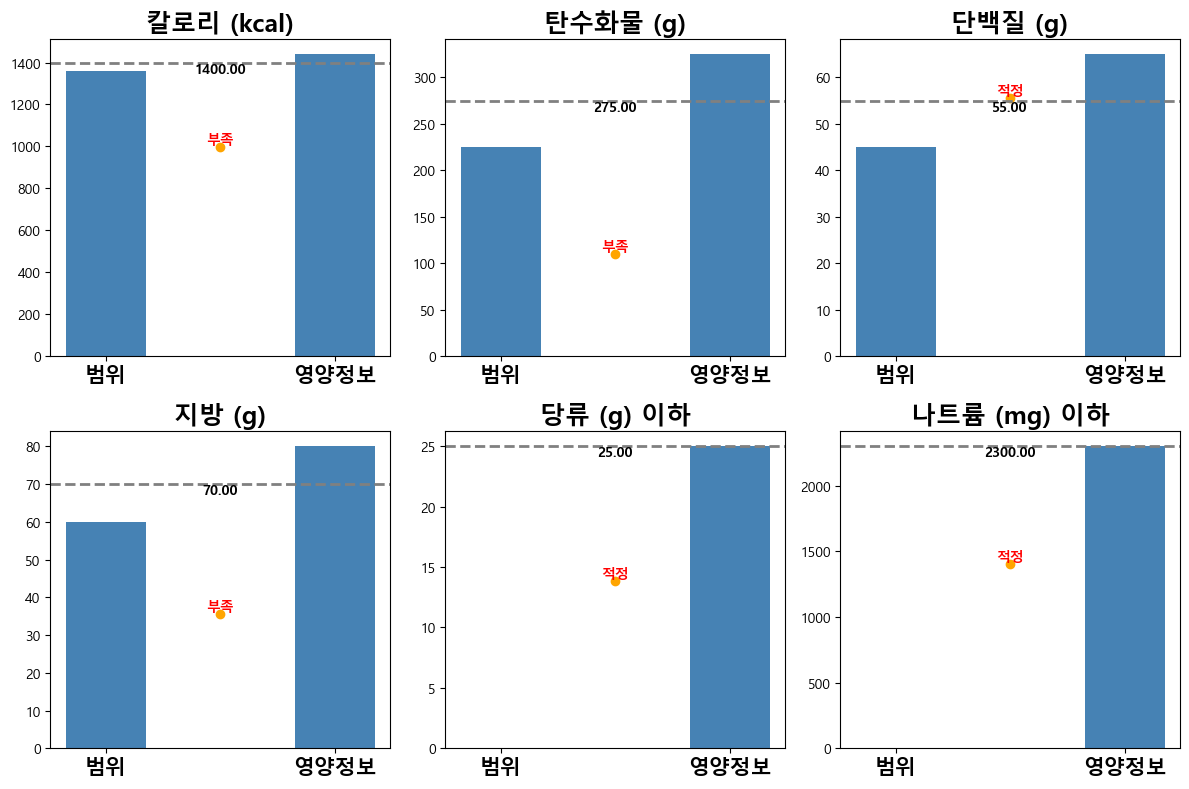

In [ ]:
kcal_mid = (kcal_min + kcal_max) / 2
carb_mid = (carb_min + carb_max) / 2
protein_mid = (protein_min + protein_max) / 2
fat_mid = (fat_min + fat_max) / 2

# 부족, 적정, 과다 구분 함수
def compare_value(value, range):
    if value < range[0]:
        return '부족'
    elif value > range[1]:
        return '과다'
    else:
        return '적정'

# 그래프 데이터 설정
labels = ['칼로리 (kcal)', '탄수화물 (g)', '단백질 (g)', '지방 (g)', '당류 (g) 이하', '나트륨 (mg) 이하']
ranges = [(kcal_min, kcal_max), (carb_min, carb_max), (protein_min, protein_max), (fat_min, fat_max), (0, sugar_max), (0, sodium_max)]
nutrient_data = result1

# 평균값 계산
avg_values = [kcal_mid, carb_mid, protein_mid, fat_mid, sugar_max, sodium_max]

# 그래프 그리기
fig, axs = plt.subplots(2, 3, figsize=(12, 8))
for i in range(2):
    for j in range(3):
        index = i * 3 + j
        ax = axs[i, j]
        ax.bar([0, 1], ranges[index], width=0.35, color='steelblue', label='범위')
        ax.scatter(0.5, nutrient_data[index], color='orange', label='영양정보 데이터')
        ax.axhline(avg_values[index], color='gray', linestyle='--', linewidth=2, label='평균')
        ax.text(0.5, nutrient_data[index], compare_value(nutrient_data[index], ranges[index]), ha='center', va='bottom', color='red', fontweight='bold')
        ax.text(0.5, avg_values[index], f'{avg_values[index]:.2f}', ha='center', va='top', color='black', fontweight='bold')
        ax.set_title(labels[index], size=18, weight='bold')
        ax.set_xticks([0, 1])
        ax.set_xticklabels(['범위', '영양정보'], size=15, weight='bold')

plt.tight_layout()
plt.show()

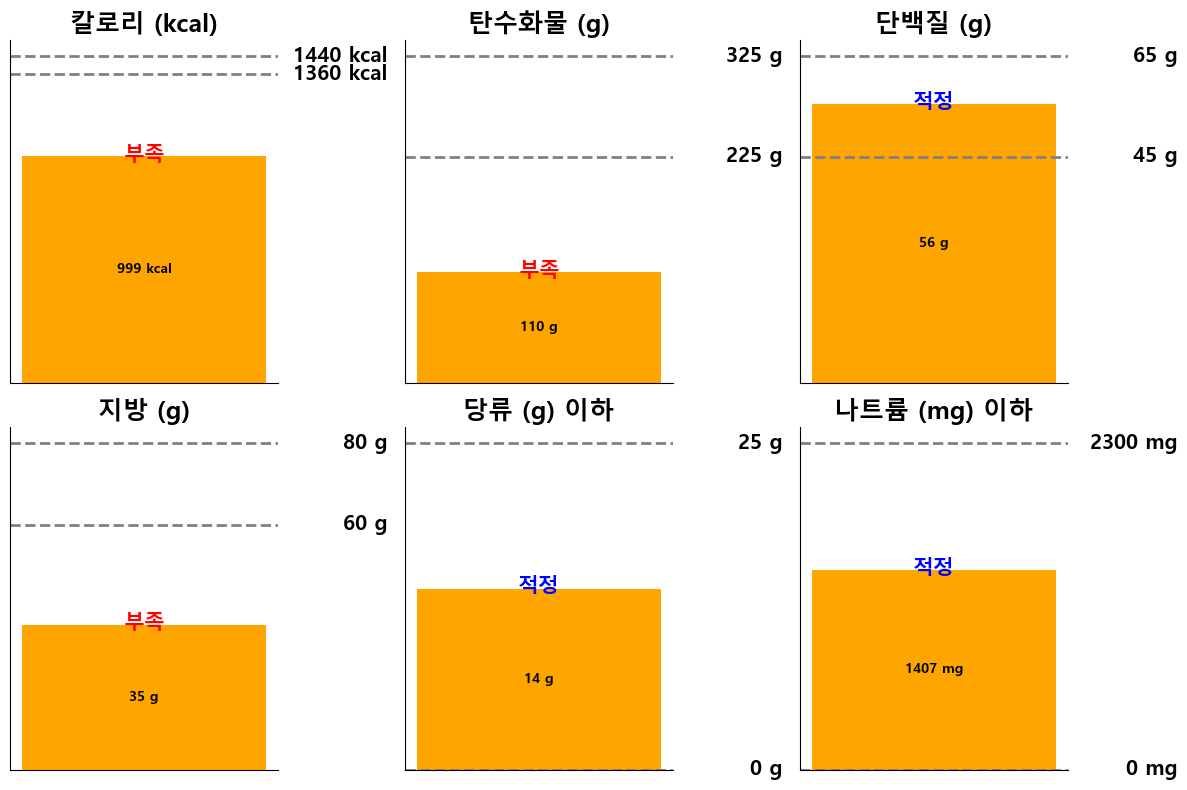

In [ ]:
import matplotlib.pyplot as plt

# 그래프 데이터 설정
labels = ['칼로리 (kcal)', '탄수화물 (g)', '단백질 (g)', '지방 (g)', '당류 (g) 이하', '나트륨 (mg) 이하']
units = ['kcal', 'g', 'g', 'g', 'g', 'mg']
ranges = [(kcal_min, kcal_max), (carb_min, carb_max), (protein_min, protein_max), (fat_min, fat_max), (0, sugar_max), (0, sodium_max)]
nutrient_data = result1

# 부족, 적정, 과다 구분 함수
def compare_value(value, range):
    if value < range[0]:
        return '부족'
    elif value > range[1]:
        return '과다'
    else:
        return '적정'

# 그래프 그리기
fig, axs = plt.subplots(2, 3, figsize=(12, 8))
for i in range(2):
    for j in range(3):
        index = i * 3 + j
        ax = axs[i, j]
        ax.axhline(ranges[index][0], color='gray', linestyle='--', linewidth=2)
        ax.axhline(ranges[index][1], color='gray', linestyle='--', linewidth=2)
        bar = ax.bar(['영양정보'], [nutrient_data[index]], color='orange', label=labels[index], align='center')
        ax.set_title(labels[index], size=18, weight='bold')
        ax.set_xticks([])
        ax.set_yticks([])
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)

        # 수치 표시
        ax.text(0.8, ranges[index][0], f"{str(ranges[index][0])} {units[index]}", ha='right', va='center', color='black', fontweight='bold', size='15')
        ax.text(0.8, ranges[index][1], f"{str(ranges[index][1])} {units[index]}", ha='right', va='center', color='black', fontweight='bold', size='15')  
        bar_value = nutrient_data[index]
        bar_height = bar[0].get_height()
        ax.text(0, bar_height/2, f"{str(round(bar_value))} {units[index]}", ha='center', va='center', color='black', fontweight='bold')
        if compare_value(bar_value, ranges[index]) == '적정':
            ax.text(0, bar_height + 0.1, compare_value(bar_value, ranges[index]), ha='center', va='center', color='blue', fontweight='bold',size=15)
        else:
            ax.text(0, bar_height + 0.1, compare_value(bar_value, ranges[index]), ha='center', va='center', color='red', fontweight='bold',size=15)
        
        
plt.tight_layout()
plt.show()


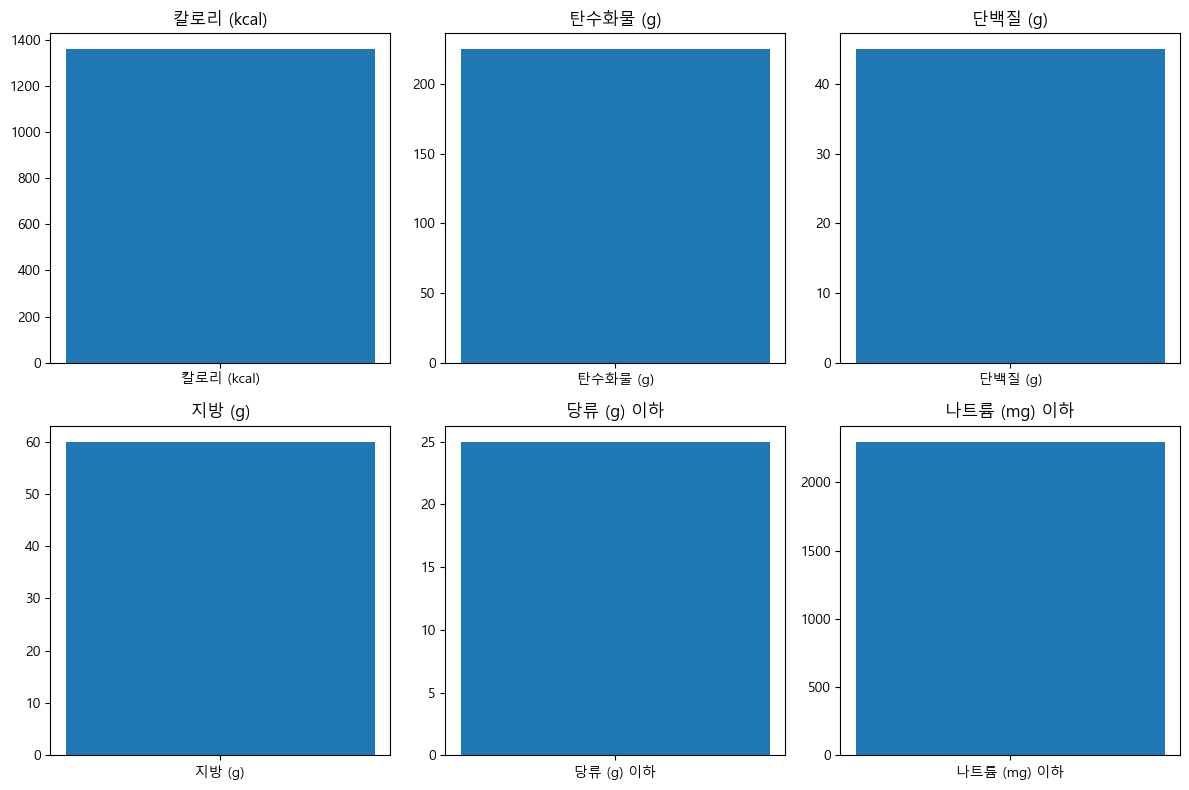

In [ ]:
import matplotlib.pyplot as plt

# 그래프의 데이터 설정
labels = ['칼로리 (kcal)', '탄수화물 (g)', '단백질 (g)', '지방 (g)', '당류 (g) 이하', '나트륨 (mg) 이하']
values = [kcal_min, carb_min, protein_min, fat_min, sugar_max, sodium_max]

# subplot 설정
fig, axs = plt.subplots(2, 3, figsize=(12, 8))  # 2행 3열의 subplot 생성

# 각각의 subplot에 그래프 그리기
for i in range(2):
    for j in range(3):
        index = i * 3 + j  # subplot 인덱스 계산
        ax = axs[i, j]  # 현재 subplot 선택
        ax.bar(labels[index], values[index])  # 막대 그래프 그리기
        ax.set_title(labels[index])  # subplot 제목 설정

# 그래프 출력
plt.tight_layout()
plt.show()


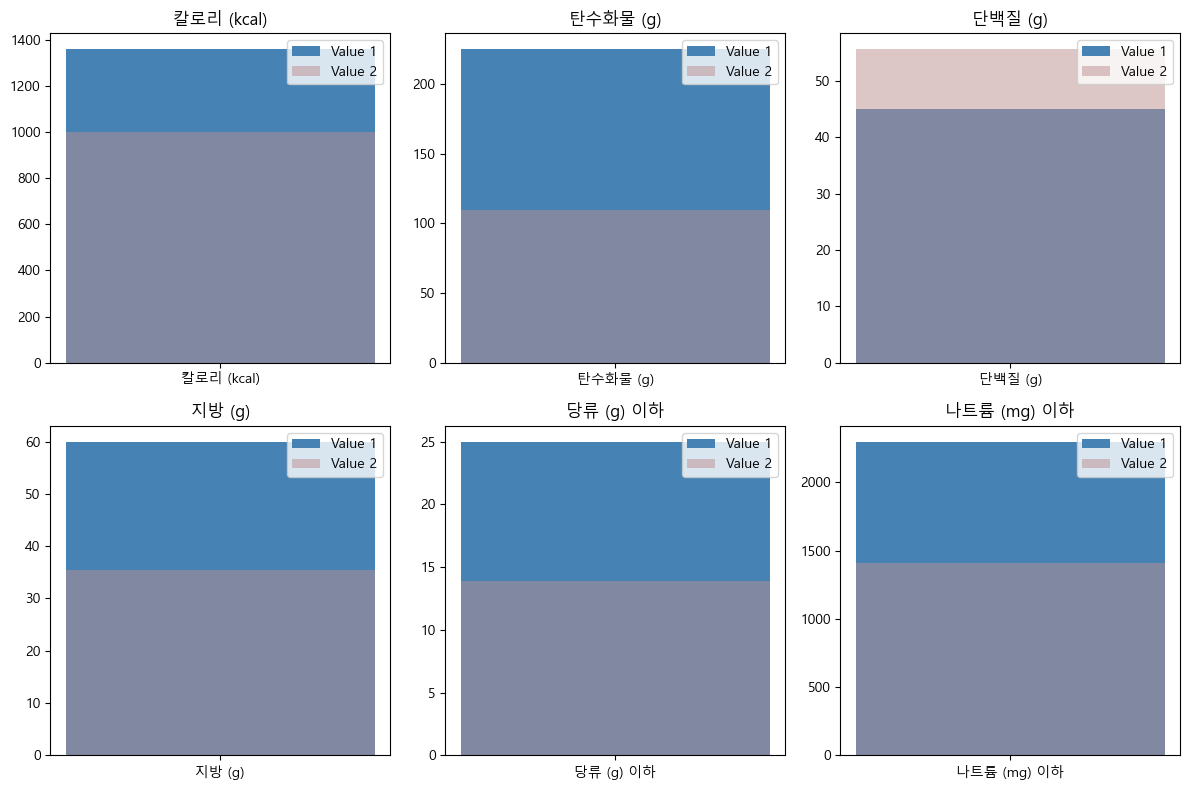

In [ ]:
import matplotlib.pyplot as plt

# 그래프의 데이터 설정
labels = ['칼로리 (kcal)', '탄수화물 (g)', '단백질 (g)', '지방 (g)', '당류 (g) 이하', '나트륨 (mg) 이하']
values1 = [kcal_min, carb_min, protein_min, fat_min, sugar_max, sodium_max]  # 위의 값들
values2 = [result1[0], result1[1], result1[2], result1[3], result1[4], result1[5]]  # result1의 값들

# subplot 설정
fig, axs = plt.subplots(2, 3, figsize=(12, 8))  # 2행 3열의 subplot 생성

# 각각의 subplot에 그래프 그리기
for i in range(2):
    for j in range(3):
        index = i * 3 + j  # subplot 인덱스 계산
        ax = axs[i, j]  # 현재 subplot 선택
        ax.bar(labels[index], values1[index], color='steelblue', label='Value 1')  # 값 1의 막대 그래프 그리기 (그레이)
        ax.bar(labels[index], values2[index], color='rosybrown', label='Value 2', alpha=0.5)  # 값 2의 막대 그래프 그리기 (핑크)
        ax.set_title(labels[index])  # subplot 제목 설정
        ax.legend()  # 범례 추가

# 그래프 출력
plt.tight_layout()
plt.show()


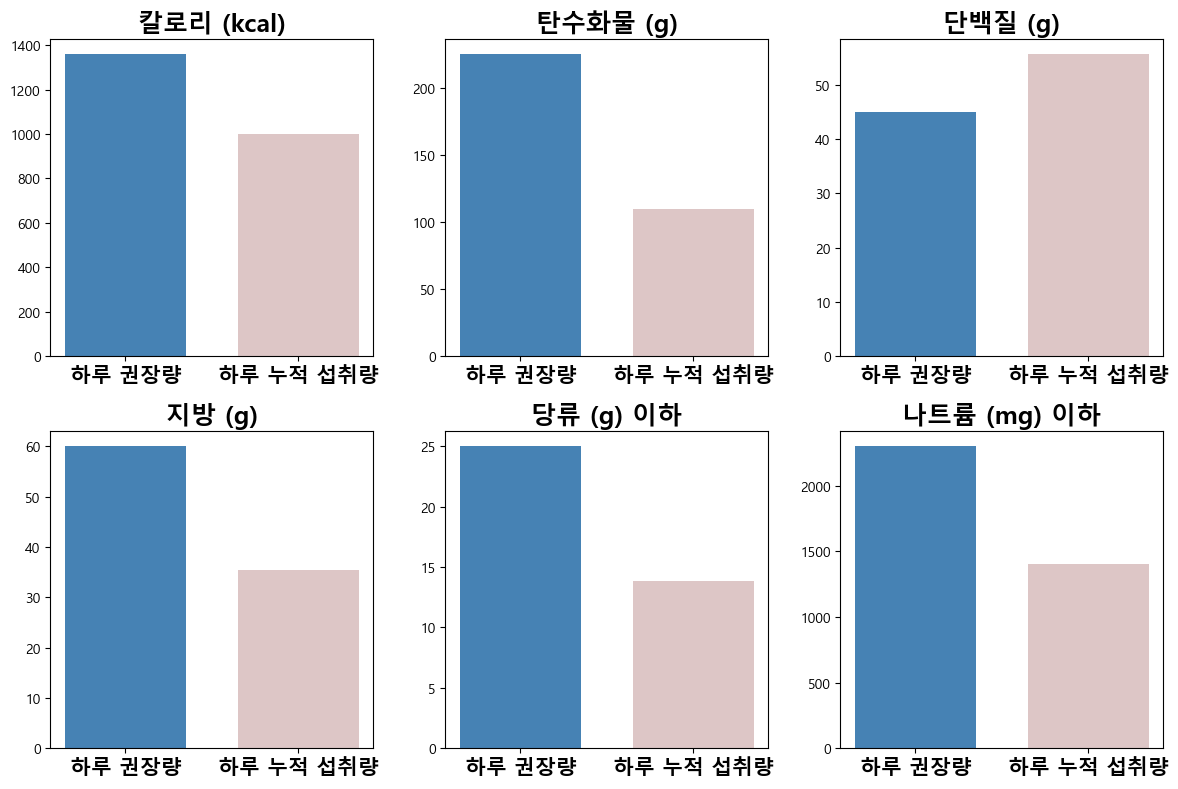

In [ ]:
import matplotlib.pyplot as plt

# 그래프의 데이터 설정
labels = ['칼로리 (kcal)', '탄수화물 (g)', '단백질 (g)', '지방 (g)', '당류 (g) 이하', '나트륨 (mg) 이하']
values1 = [kcal_min, carb_min, protein_min, fat_min, sugar_max, sodium_max]  # 위의 값들
values2 = [result1[0], result1[1], result1[2], result1[3], result1[4], result1[5]]  # result1의 값들

# subplot 설정
fig, axs = plt.subplots(2, 3, figsize=(12, 8))  # 2행 3열의 subplot 생성

# 막대 그래프의 너비와 위치 설정
bar_width = 0.35
bar_position = [0, 0.5]  # 막대 그래프의 위치 (0: 왼쪽, 0.5: 오른쪽)

# 각각의 subplot에 그래프 그리기
for i in range(2):
    for j in range(3):
        index = i * 3 + j  # subplot 인덱스 계산
        ax = axs[i, j]  # 현재 subplot 선택
        ax.bar(bar_position[0], values1[index], width=bar_width, color='steelblue', label='Value 1')  # 값 1의 막대 그래프 그리기 (그레이)
        ax.bar(bar_position[1], values2[index], width=bar_width, color='rosybrown', label='Value 2', alpha=0.5)  # 값 2의 막대 그래프 그리기 (핑크)
        ax.set_title(labels[index],size=18,weight='bold')  # subplot 제목 설정

        # x축 눈금과 레이블 설정
        ax.set_xticks(bar_position)
        ax.set_xticklabels(['하루 권장량', '하루 누적 섭취량'],size=15, weight='bold')

# 그래프 출력
plt.tight_layout()
plt.show()


TypeError: 'int' object is not subscriptable

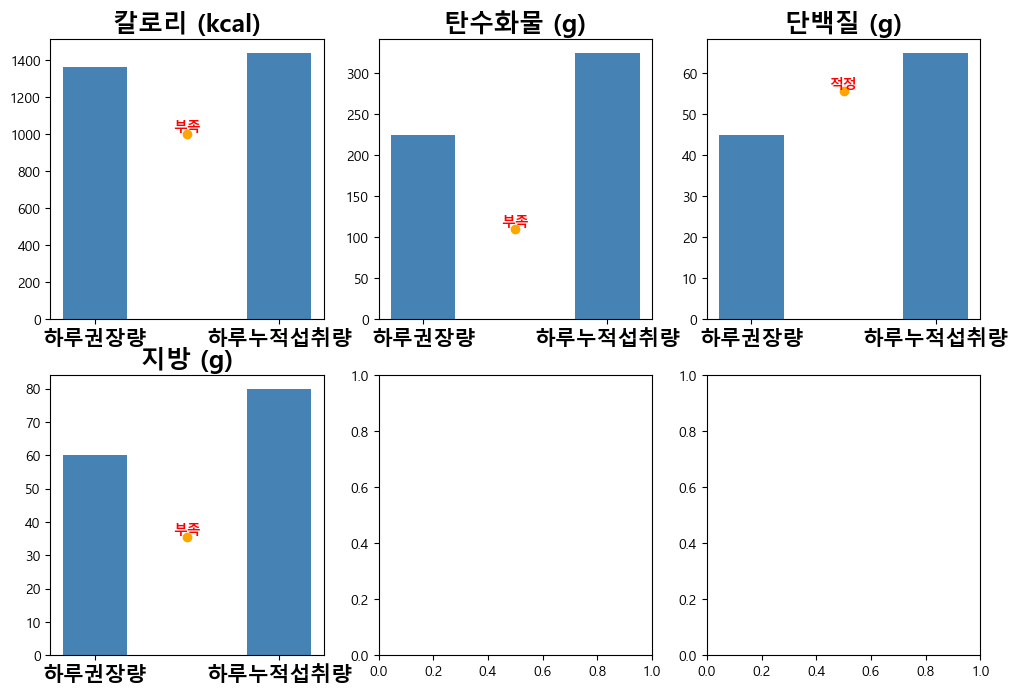

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# 예시 범위값
kcal_range = [int(result[0].split('-')[0]), int(result[0].split('-')[1])]
carb_range = [int(result[1].split('-')[0]), int(result[1].split('-')[1])]
protein_range = [int(result[2].split('-')[0]), int(result[2].split('-')[1])]
fat_range = [int(result[3].split('-')[0]), int(result[3].split('-')[1])]
sugar_max = int(result[4])
sodium_max = int(result[5])

# 중간값 계산
kcal_mid = np.mean(kcal_range)
carb_mid = np.mean(carb_range)
protein_mid = np.mean(protein_range)
fat_mid = np.mean(fat_range)

# 부족, 적정, 과다 구분 함수
def compare_value(value, range):
    if value < range[0]:
        return '부족'
    elif value > range[1]:
        return '과다'
    else:
        return '적정'

# 그래프 데이터 설정
labels = ['칼로리 (kcal)', '탄수화물 (g)', '단백질 (g)', '지방 (g)', '당류 (g) 이하', '나트륨 (mg) 이하']
ranges = [kcal_range, carb_range, protein_range, fat_range, sugar_max, sodium_max]

# 그래프 그리기
fig, axs = plt.subplots(2, 3, figsize=(12, 8))
for i in range(2):
    for j in range(3):
        index = i * 3 + j
        ax = axs[i, j]
        ax.bar([0, 1], [ranges[index][0], ranges[index][1]], width=0.35, color='steelblue', label='범위')
        ax.scatter(0.5, result1[index], color='orange', label='영양정보 데이터')
        ax.text(0.5, result1[index], compare_value(result1[index], ranges[index]), ha='center', va='bottom', color='red', fontweight='bold')
        ax.set_title(labels[index], size=18, weight='bold')
        ax.set_xticks([0, 1])
        ax.set_xticklabels(['하루권장량', '하루누적섭취량'], size=15, weight='bold')

plt.tight_layout()
plt.show()


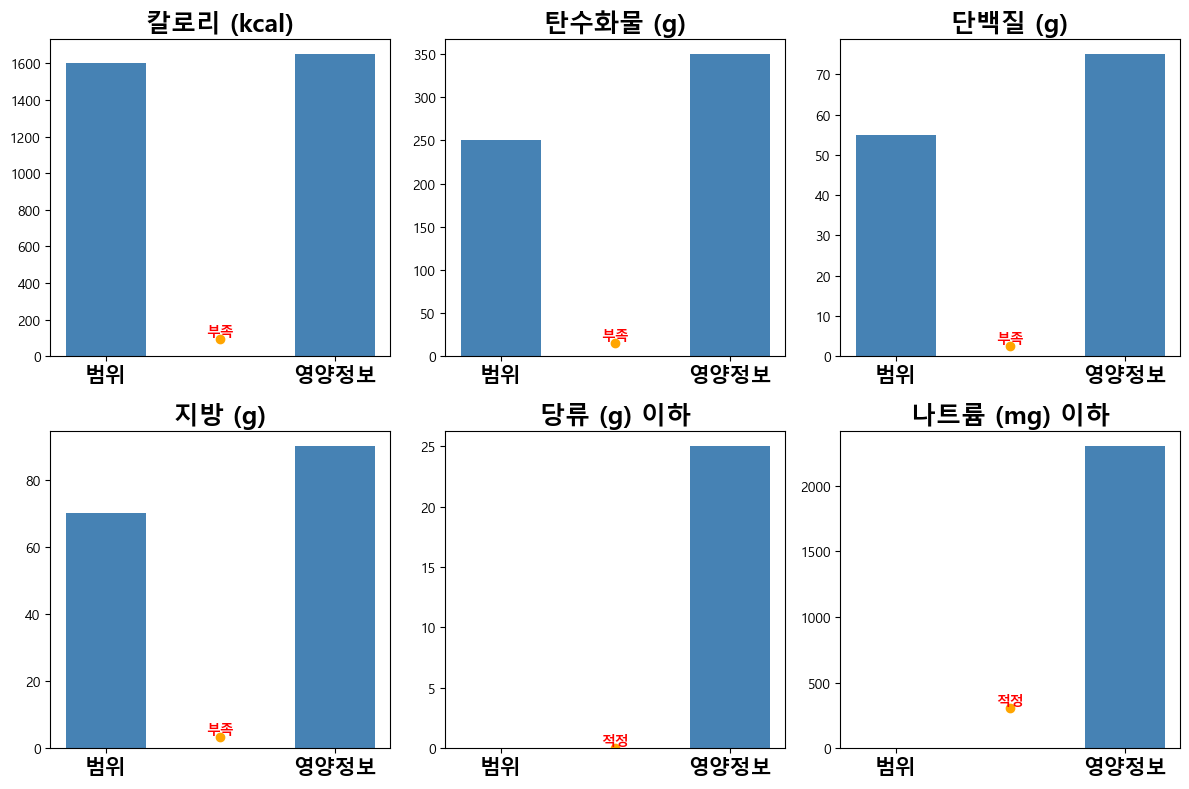

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# 예시 범위값
kcal_range = result[0]
carb_range = result[1]
protein_range = result[2]
fat_range = result[3]
sugar_max = int(result[4])
sodium_max = int(result[5])

# 중간값 계산
kcal_mid = np.mean([int(val) for val in kcal_range.split('-')])
carb_mid = np.mean([int(val) for val in carb_range.split('-')])
protein_mid = np.mean([int(val) for val in protein_range.split('-')])
fat_mid = np.mean([int(val) for val in fat_range.split('-')])

# 부족, 적정, 과다 구분 함수
def compare_value(value, range):
    if value < range[0]:
        return '부족'
    elif value > range[1]:
        return '과다'
    else:
        return '적정'

# 그래프 데이터 설정
labels = ['칼로리 (kcal)', '탄수화물 (g)', '단백질 (g)', '지방 (g)', '당류 (g) 이하', '나트륨 (mg) 이하']
ranges = [(0, sugar_max) if label == '당류 (g) 이하' else tuple(map(int, val.split('-'))) for label, val in zip(labels, [kcal_range, carb_range, protein_range, fat_range, '0-' + str(sugar_max), '0-' + str(sodium_max)])]
nutrient_data = result1

# 그래프 그리기
fig, axs = plt.subplots(2, 3, figsize=(12, 8))
for i in range(2):
    for j in range(3):
        index = i * 3 + j
        ax = axs[i, j]
        ax.bar([0, 1], ranges[index], width=0.35, color='steelblue', label='범위')
        ax.scatter(0.5, nutrient_data[index], color='orange', label='영양정보 데이터')
        ax.text(0.5, nutrient_data[index], compare_value(nutrient_data[index], ranges[index]), ha='center', va='bottom', color='red', fontweight='bold')
        ax.set_title(labels[index], size=18, weight='bold')
        ax.set_xticks([0, 1])
        ax.set_xticklabels(['범위', '영양정보'], size=15, weight='bold')

plt.tight_layout()
plt.show()
